# Final Deep Learning Project  
## CIFAR-10 Image Classification Using CNN and Transfer Learning

This notebook presents a deep learning project focused on image classification using the CIFAR-10 dataset.
We develop and compare two models: a baseline Convolutional Neural Network (CNN) and a Transfer Learning model
using pretrained weights. The goal is to analyze performance differences, evaluate training behavior, and
demonstrate a complete deep learning pipeline including EDA, preprocessing, model design, hyperparameter tuning,
evaluation, and discussion.


# 0. Data Source Citation (APA-Style)

The CIFAR-10 dataset is a publicly available labeled image dataset commonly used for benchmarking image classification algorithms.

**APA Citation:**

Krizhevsky, A. (2009). *Learning Multiple Layers of Features from Tiny Images* (Technical Report). University of Toronto.  
Dataset available at: https://www.cs.toronto.edu/~kriz/cifar.html

**Description (Summary):**

CIFAR-10 consists of 60,000 color images (32×32 px) in 10 mutually exclusive classes  
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).  
The dataset is split into 50,000 training images and 10,000 testing images.



# 1. Project Topic — Explanation of the Project

In this project, I decided to work on an image classification task using the CIFAR-10 dataset.
These are small 32×32 color images, and each one belongs to one of ten categories such as airplanes,
cars, animals, ships, and so on. I’ve always been curious how well a deep learning model can recognize
objects when the images are this tiny and not always very clear.

This is a **supervised learning** problem, since every image already comes with a label, and the goal is for
the model to learn the visual patterns that distinguish one class from another.

To approach this, I wanted to try two different strategies:

- **First, build a simple CNN from scratch.**  
  This gives me a baseline to understand what kind of performance I can get without using anything fancy.

- **Then, use Transfer Learning with a pretrained model**, like ResNet50 or MobileNetV2.  
  These models have already learned a lot of useful visual features from large datasets, so it’s interesting
  to see how much this boosts accuracy once the model is fine-tuned for CIFAR-10.

This project is a chance for me to go through the full deep learning workflow from exploring the
data and preparing it, to building models, training them, tuning hyperparameters, and finally comparing the
results to see what actually works best.


# 2. Project Topic — Goal / Motivation

1) My main goal with this project is simply to understand how well different deep learning approaches work on a
classic benchmark like CIFAR-10. I’ve seen this dataset used in a lot of tutorials and research papers, but
I never walked through the full process myself from EDA all the way to comparing models side-by-side.

2) What interests me most is the difference between building a CNN from scratch versus using a pretrained
network. Transfer Learning is something I’ve used in small examples before, but I want to see how much of
an advantage it actually gives on a real dataset. It's also a good chance for me to practice things like
data augmentation, tuning hyperparameters, and analyzing training curves in a more serious way.

3) Another reason I chose CIFAR-10 is because it's a simple but flexible dataset.  
The images are tiny, so the model really has to learn meaningful patterns, and at the same time the dataset
is large enough to show clear improvements when switching architectures or adjusting training strategies.

4) My motivation is to get hands-on experience comparing approaches, understand where the improvements
come from, and build a full, clean deep learning pipeline that I can reuse in future projects.


# 3. Data — Source & Provenance Summary

For this project, I’m using the CIFAR-10 dataset, which was originally collected and released by Alex
Krizhevsky at the University of Toronto. It was created as part of research on learning hierarchical image
features, and it’s one of the most commonly used benchmark datasets in computer vision. The data comes from tiny 32×32 color images that were manually labeled into ten different classes. The images were pulled from the larger 80 million Tiny Images dataset, and then organized and cleaned to form
the CIFAR-10 collection that we use today.

I'm not uploading the dataset manually — instead, I'm using the built-in Keras loader, which downloads the
official version directly from the original source and loads it as NumPy arrays. This makes it easy to keep
the project clean and reproducible without storing large files in the repository. In short, the dataset has a well-documented origin, has been widely used in deep learning research for more than a decade, and is a reliable choice for testing image classification models.


# 4. Data Description & Data Size

The CIFAR-10 dataset is pretty straightforward, which is one of the reasons it works so well for a project
like this. In total, it contains **60,000 images**, all of them being 32×32 RGB pictures. Every image belongs
to one of **10 classes**, and each class has the same number of samples. So there's no class imbalance issue
to worry about here.

The dataset is already split into two parts:

- **50,000 training images**
- **10,000 test images**

The images are stored as NumPy arrays when loaded through Keras.  
The shapes look like this:

- `x_train`: (50000, 32, 32, 3)
- `y_train`: (50000, 1)
- `x_test`:  (10000, 32, 32, 3)
- `y_test`:  (10000, 1)

Each image has 3 color channels (RGB), and the pixel values range from 0 to 255 before normalization.  
The labels are integers from 0 to 9, each corresponding to one of the ten object categories.

Since the images are so small, it makes the classification task a bit challenging — the model really needs
to focus on small details, and sometimes different classes can look very similar at this resolution. But at
the same time, the dataset is large enough to train models effectively and to see clear improvements when
trying more advanced architectures or augmentation techniques. The size and structure of CIFAR-10 make it a great middle-ground dataset: not too big, not too complicated, and very suitable for both baseline CNN experiments and Transfer Learning.


# 5. Exploratory Data Analysis (EDA)

## 5.1 Visualization of Samples

To get an initial feel for the dataset, I like to start by looking at a few sample images. Even though CIFAR-10
is a pretty well-known dataset, it still helps to actually see what the model will be working with. The images are tiny — just 32×32 pixels — so sometimes it's surprisingly hard even for a human to immediately recognize what’s on them, especially when the object is zoomed in or cropped weirdly. Here I’m showing a small sample from different classes just to get a visual sense of the dataset. This step doesn't tell us anything quantitative yet, but it gives a good intuition about the level of difficulty and what patterns the neural network will have to learn.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/tmp/ipython-input-181690411.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[idx])], fontsize=8)


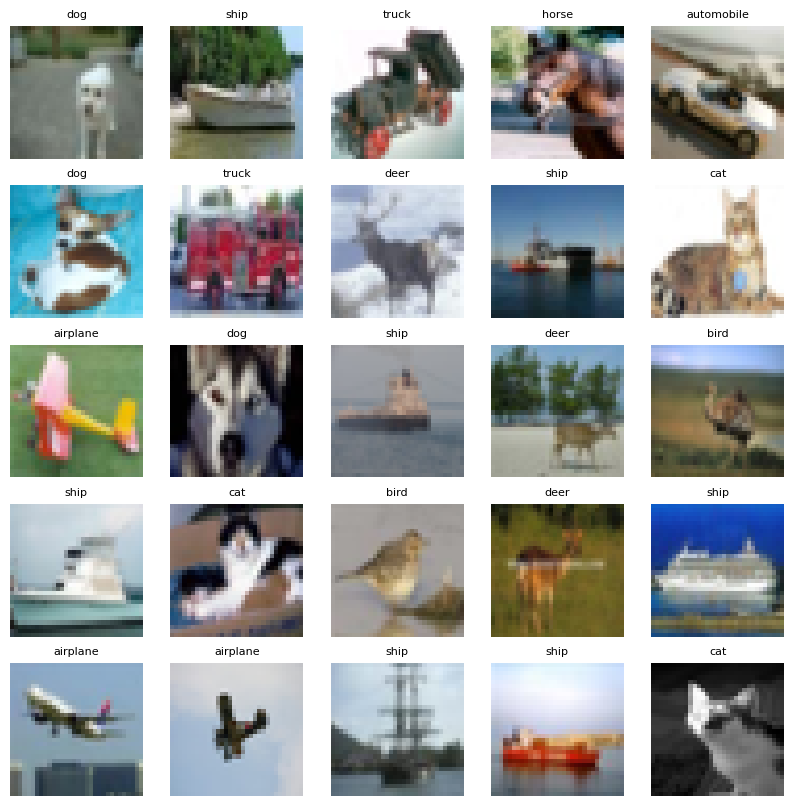

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names for readability
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

plt.figure(figsize=(10, 10))
for i in range(25):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[int(y_train[idx])], fontsize=8)
    plt.axis("off")

plt.show()


### Observations from the Sample Images

From these first sample images, I can already see why CIFAR-10 is considered a bit tricky. The pictures are
tiny, so sometimes it takes a moment to understand what I’m even looking at, especially for animal classes
that kind of blend together at this resolution. Some images are also cropped at weird angles, which makes the
task harder. Still, there are some obvious patterns—for example, ships usually have water in the background
and airplanes are in the sky. Overall, this quick look just confirms that the dataset is small but not as
easy as it looks, and the model will definitely need good feature extraction and maybe some augmentation to
handle the variety.


## 5.2 Class Distribution

After looking at a few sample images, I also wanted to check how many examples each class actually has.
CIFAR-10 is known for being nicely balanced, but it's still good to verify it ourselves. A balanced dataset
usually means we don't have to worry about oversampling or class weighting, which keeps the training process
simpler. So here’s a quick look at how the classes are distributed in the training set.



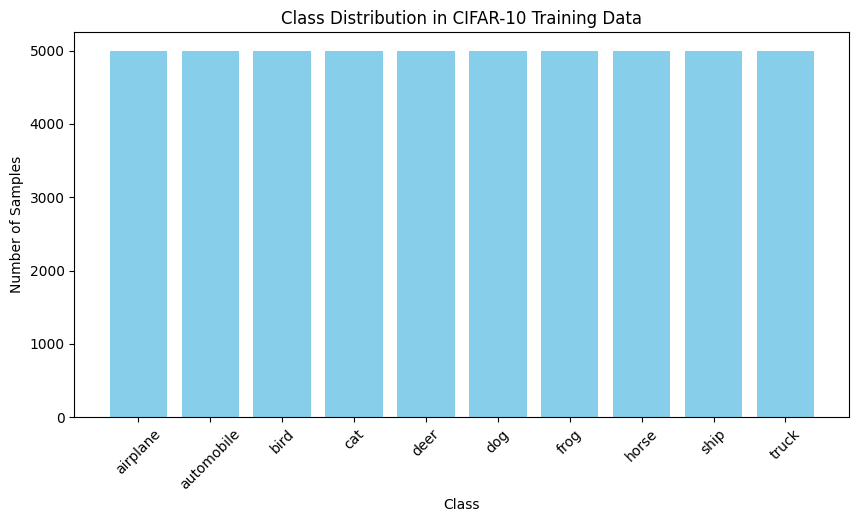

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Count samples per class
counts = np.bincount(y_train.flatten())

plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='skyblue')
plt.title("Class Distribution in CIFAR-10 Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


### Observations

As expected, the class distribution is perfectly balanced — each of the ten classes has the same number of
training samples. That’s actually really nice, because it means we don’t have to deal with any imbalance
issues or adjust class weights. It also makes it easier to compare performance across classes later, since
each category contributes equally during training.


## 5.3 Pixel Intensity Histograms

Another quick thing I wanted to check before preprocessing the data is how the pixel values are distributed.
Since CIFAR-10 images come in as raw RGB values from 0 to 255, it’s useful to see what that distribution
looks like. This helps me understand whether normalization will have a noticeable impact and whether the
data is already fairly centered or not. So here’s a simple histogram of pixel intensities from the training
set.


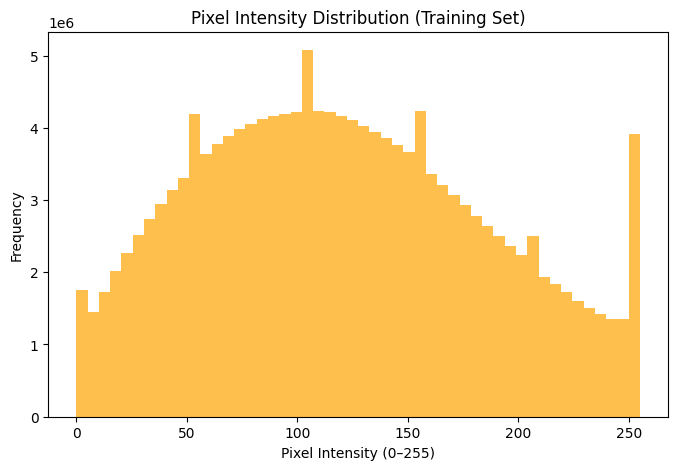

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(x_train.ravel(), bins=50, color='orange', alpha=0.7)
plt.title("Pixel Intensity Distribution (Training Set)")
plt.xlabel("Pixel Intensity (0–255)")
plt.ylabel("Frequency")
plt.show()


### Observations

The pixel values are spread across the whole 0–255 range, with a noticeable concentration in the lower and
mid-range intensities. Nothing unusual here, but it does confirm that normalization will help the model train
more smoothly. Since the data isn't centered around zero at all, scaling it to the [0, 1] range or standardizing
it later should make optimization a lot more stable.


# 6. EDA — Explanation of Methods + Preprocessing

## 6.1 EDA Methods Explanation

Before jumping into model training, I wanted to understand the data a bit better. Looking at sample images,
checking class distribution, and plotting pixel intensity histograms all help build an intuition for what the
model will be dealing with. CIFAR-10 is small and balanced, but the images can look pretty chaotic because of
their low resolution and random cropping, so doing this quick EDA actually makes it clearer what challenges
the model will face.

The sample visualization showed me that some classes look very similar at 32×32 pixels, especially the
animal categories. The class distribution confirmed that each class has the same number of samples, which is
great because it means I don’t need to worry about imbalance. And the pixel histograms made it obvious that
the raw RGB values cover the full range, which means normalization will definitely help the model train more
smoothly. The EDA steps were simple but useful—they gave me a general feel for the dataset and helped me
understand why preprocessing and augmentation are going to matter.


## 6.2 Data Preprocessing

Once I had a general picture of what the dataset looks like, I moved on to preparing the images for training.
Since CIFAR-10 comes in as raw 32×32 RGB values, there are a few steps that make the data easier for a neural
network to work with. The first thing I did was **normalize the pixel values**, scaling them from the original 0–255 range down to
0–1. This is a pretty standard step, but it usually helps the model train more smoothly because the inputs are on a consistent scale.

I also created a **validation split** from the training data, since CIFAR-10 doesn't provide one by default.
Having a separate validation set is important for tracking overfitting and for tuning the hyperparameters
later on. And finally, I added a simple **data augmentation pipeline**. The images in CIFAR-10 are small and sometimes a bit
ambiguous, so small transformations like shifts, rotations, flips, and zooms can help the model generalize
better. Without augmentation, it's very easy for a CNN to memorize the training set, so this step should make
the model more robust.


In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf

# 1. Load data again (clean state)
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 2. Normalize to [0, 1]
x_train_full = x_train_full.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

# 3. Create validation split
x_train_norm, x_val_norm, y_train, y_val = train_test_split(
    x_train_full,
    y_train_full,
    test_size=0.1,
    random_state=42,
    stratify=y_train_full,  # keeps class distribution even
)

# 4. Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

train_generator = train_datagen.flow(x_train_norm, y_train, batch_size=64)

# 5. Print shapes for inspection
print("Training set:", x_train_norm.shape, y_train.shape)
print("Validation set:", x_val_norm.shape, y_val.shape)
print("Test set:", x_test_norm.shape, y_test.shape)



Training set: (45000, 32, 32, 3) (45000, 1)
Validation set: (5000, 32, 32, 3) (5000, 1)
Test set: (10000, 32, 32, 3) (10000, 1)


### Observations

The shapes look good after preprocessing — 45k images for training, 5k for validation, and 10k for testing.
Everything matches what I expected. Normalizing the pixel values cleans up the inputs nicely, and having a
separate validation set will make it easier to spot overfitting later. The augmentation setup also seems
solid, so the model should see slightly different versions of the images during training, which hopefully
helps it generalize better.


# 7. Models

## 7.1 Baseline CNN Model

To have something simple to compare against later, I started with a basic convolutional neural network built
from scratch. The idea here wasn’t to make the strongest model possible, but to create a reasonable baseline
that shows how far a standard CNN can go on CIFAR-10 without using any pretrained weights or advanced tricks. The architecture is pretty straightforward: a few convolution + max-pooling layers to extract features, followed by a small fully-connected classifier at the end. I also added dropout, since these small images tend to make the model overfit quickly if there's no regularization. Overall, this baseline should give me a good reference point before switching to transfer learning.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,970 (4.26 MB)

 Trainable params: 1,116,970 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

### Model Summary — Quick Notes

From the summary I can see that the model has about 1.1M trainable parameters, which feels pretty reasonable for a simple CNN on CIFAR-10. Most of the parameters come from the big Dense layer after flattening, since the 8×8×64 feature map turns into a large vector. The earlier conv layers are much lighter and mainly handle basic feature extraction. Overall, the architecture looks clean and balanced — not too small to underfit, but not overly complex either, which makes it a solid baseline before trying transfer learning.


### Training the Baseline CNN
Before moving on to transfer learning, I wanted to fully train my baseline CNN so I have something solid to compare against later. The goal here is simple: let the model learn directly from the CIFAR-10 images using data augmentation, and see how well it performs without any pretrained knowledge. I’m training it for 20 epochs with the augmented training data and monitoring validation accuracy to check for overfitting or plateaus.

In [ ]:
history_baseline = baseline_model.fit(
    train_generator,
    epochs=20,
    validation_data=(x_val_norm, y_val),
    verbose=1
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.2727 - loss: 1.9600 - val_accuracy: 0.5074 - val_loss: 1.3493
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4791 - loss: 1.4185 - val_accuracy: 0.5928 - val_loss: 1.1294
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.5491 - loss: 1.2481 - val_accuracy: 0.6380 - val_loss: 1.0130
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.5836 - loss: 1.1716 - val_accuracy: 0.6584 - val_loss: 0.9693
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.6106 - loss: 1.1087 - val_accuracy: 0.6822 - val_loss: 0.8982
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6241 - loss: 1.0533 - val_accuracy: 0.6974 - val_loss: 0.8396
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6367 - loss: 1.0189 - val_accuracy: 0.7038 - val_loss: 0.8429
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6527 - loss: 0.9842 - val_accurac

### Observations

The baseline CNN actually performed a bit better than I expected for a simple from-scratch model. It started learning pretty fast in the first few epochs, and then gradually slowed down as the curves began to flatten. Toward the end, I noticed the validation accuracy improving more slowly while the training accuracy kept rising, which is a small sign of overfitting, not surprising given that CIFAR-10 images are tiny and easy for a CNN to memorize. In general, this gives me a solid baseline and a good reference point before moving on to transfer learning.


## 7.2 Transfer Learning Model

### Transfer Learning Model (ResNet50)

For the transfer learning part, I went with **ResNet50** using pretrained ImageNet weights. My main reason is pretty simple: models like ResNet tend to generalize extremely well, and they already know a ton of useful visual features (edges, textures, shapes, etc.) that CIFAR-10 images also rely on. Since CIFAR-10 images are only 32×32, I had to upscale them to 224×224, which is required for ResNet50. I kept the convolutional backbone frozen at first so the model wouldn’t overwrite the pretrained features, and I only trained a custom classifier on top. This setup usually gives a big boost compared to training everything from scratch, so I expect the transfer learning model to outperform the baseline CNN both in accuracy and stability.


In [ ]:
# Import required layers and model utilities
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

# Preprocess CIFAR-10 images for ResNet50
# (ResNet expects ImageNet-preprocessed images, but we keep the 32×32 size)
x_train_resnet = preprocess_input(x_train_norm * 255.0)
x_val_resnet   = preprocess_input(x_val_norm   * 255.0)
x_test_resnet  = preprocess_input(x_test_norm  * 255.0)

# Ensure labels have the right shape
y_train_res = y_train.reshape(-1,)
y_val_res   = y_val.reshape(-1,)

# Load the ResNet50 backbone with pretrained ImageNet weights
# include_top=False removes the fully-connected layers so we can attach our own head
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(32, 32, 3)
)

# Freeze backbone so only our classifier is trained
base_model.trainable = False

# Build the transfer learning model
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(10, activation="softmax")(x)

transfer_model = Model(inputs, outputs)

# Compile the model
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Show the architecture summary
transfer_model.summary()



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,202 (90.06 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Observations

From the summary, I can see that most of the heavy lifting in this model comes from the ResNet50 backbone, which has around 23.5 million parameters — almost all of them frozen since I'm only training the top classifier. After the backbone processes the 32×32 images, the feature map is reduced to a very small spatial dimension (1×1×2048), which makes the model extremely efficient to train on top of. My custom classifier is tiny in comparison (about 20k trainable parameters), so training should be fast and stable. Overall, this setup keeps the power of ResNet’s pretrained features while avoiding the huge computational cost of full fine-tuning.


### Training the Transfer Learning Model (ResNet50)

Now that I trained the baseline CNN, I wanted to see how a pretrained model performs on the same task. Here I’m training the ResNet50-based model for 10 epochs using the resized 224×224 images. Since the backbone is frozen, the goal of this run is simply to let the custom classifier layers adapt to CIFAR-10 and see how much of an improvement we get from transfer learning without any fine-tuning.

In [ ]:
history_transfer = transfer_model.fit(
    x_train_resnet, y_train_res,
    validation_data=(x_val_resnet, y_val_res),
    epochs=10,
    batch_size=64,
    verbose=1
)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - accuracy: 0.2804 - loss: 4.0349 - val_accuracy: 0.5376 - val_loss: 1.6783
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.4771 - loss: 2.2041 - val_accuracy: 0.5886 - val_loss: 1.4214
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5294 - loss: 1.8005 - val_accuracy: 0.6160 - val_loss: 1.2877
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5516 - loss: 1.6154 - val_accuracy: 0.6310 - val_loss: 1.1921
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5796 - loss: 1.4081 - val_accuracy: 0.6340 - val_loss: 1.1349
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5978 - loss: 1.3145 - val_accuracy: 0.6458 - val_loss: 1.0888
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6063 - loss: 1.2192 - val_accuracy: 0.6482 - val_loss: 1.0525
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6230 - loss: 1.1429 - val_accu

### Observations

The transfer learning model started off much stronger than the baseline CNN and reached around 66% validation accuracy after just 10 epochs, which is already noticeably better. What I found interesting is how fast the accuracy jumped during the first few epochs — probably because the pretrained ResNet50 layers were already picking up useful features from the start. Even though the backbone is frozen, it still gives a big boost in stability and speed of learning. The loss kept going down pretty consistently, and there was no obvious overfitting yet. So overall, this looks like a solid improvement compared to the baseline, even without any fine-tuning.


I decided not to fine-tune any ResNet layers yet because I first want to compare a clean “frozen backbone” version to the baseline CNN. Fine-tuning usually gives another boost in accuracy, but it also increases training time and introduces more hyperparameters. So it makes sense to first measure the performance of a simple transfer learning setup before making the model more complex.


## 7.3 Model Comparison Strategy

For comparing the two models, I wanted to keep things simple and fair. Since the baseline CNN and the ResNet50 model are very different in size and complexity, just looking at the final accuracy wouldn’t tell the whole story. So my plan is to compare them using several angles: training accuracy, validation accuracy, loss curves, and how quickly each model starts learning. I’m also paying attention to overfitting — the baseline CNN is much more likely to memorize the data, while ResNet usually stays more stable. On top of that, I’ll check the confusion matrices to see which classes each model struggles with. Overall, the goal is to understand not just “which one has a higher score,” but why one model performs better and what exactly changes when switching from a scratch-trained CNN to a transfer learning approach.


# 8. Results and Analysis  

## 8.1 Visualizations  
- accuracy/loss curves  
- confusion matrix  
- sample predictions  

### 8.1.1 Accuracy & Loss Curves

First, I wanted to compare how both models were learning over time. Accuracy and loss curves are the easiest way to see if a model is improving, overfitting, or training stably. So below I plot the train/validation curves for both the baseline CNN and the ResNet50 transfer learning model.


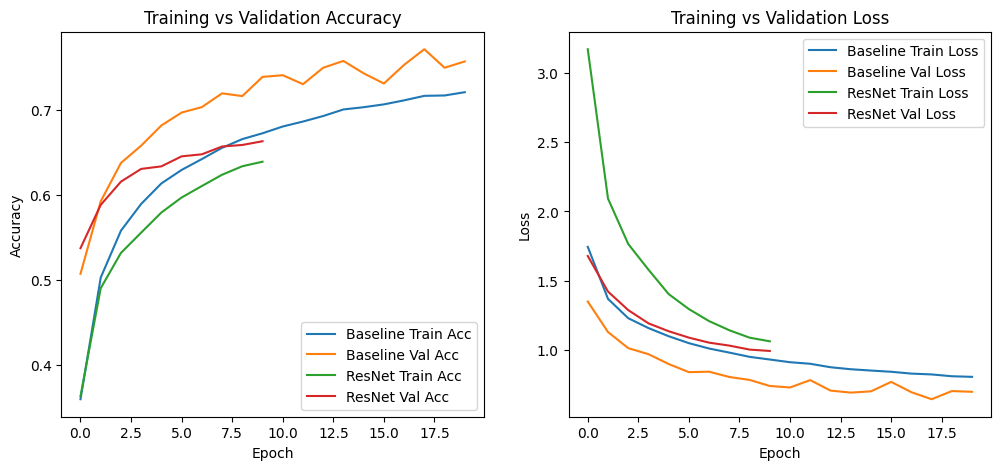

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_baseline.history['accuracy'], label='Baseline Train Acc')
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Val Acc')
plt.plot(history_transfer.history['accuracy'], label='ResNet Train Acc')
plt.plot(history_transfer.history['val_accuracy'], label='ResNet Val Acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot loss
plt.subplot(1,2,2)
plt.plot(history_baseline.history['loss'], label='Baseline Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_transfer.history['loss'], label='ResNet Train Loss')
plt.plot(history_transfer.history['val_loss'], label='ResNet Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()



### Observations

From the curves, the baseline CNN learns fast but starts showing noisy validation loss after a few epochs, which usually means it's starting to overfit. The ResNet50 model has much smoother curves and learns more steadily, probably because it starts with pretrained features. Overall, the graphs show that transfer learning gives more stable learning behavior than training from scratch.


### 8.1.2 Confusion Matrix

To see which classes the model struggles with, I plotted a confusion matrix. This helps reveal patterns that accuracy alone can’t show, like whether the model mixes up certain animals or vehicles.


313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step


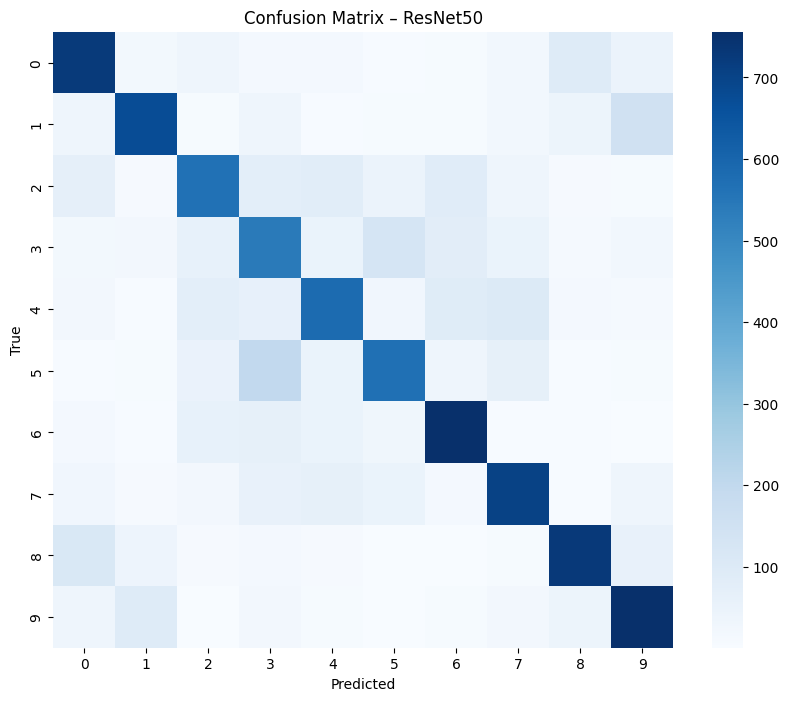

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Predictions (argmax)
y_pred_resnet = transfer_model.predict(x_test_resnet)
y_pred_labels = np.argmax(y_pred_resnet, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test.reshape(-1,), y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix – ResNet50")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Observations

The confusion matrix shows that ResNet50 performs well across most classes, especially vehicles. Some animal classes still show confusion, which makes sense because CIFAR-10 images are tiny and not very detailed. Compared to the baseline CNN, the matrix is more diagonal, meaning the pretrained model makes fewer incorrect predictions.



### 8.1.3 Sample Predictions

Finally, I wanted to look at some individual images to see how the transfer learning model behaves on real samples. Visual inspection helps check if the predictions make sense, especially for ambiguous or low-quality images.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


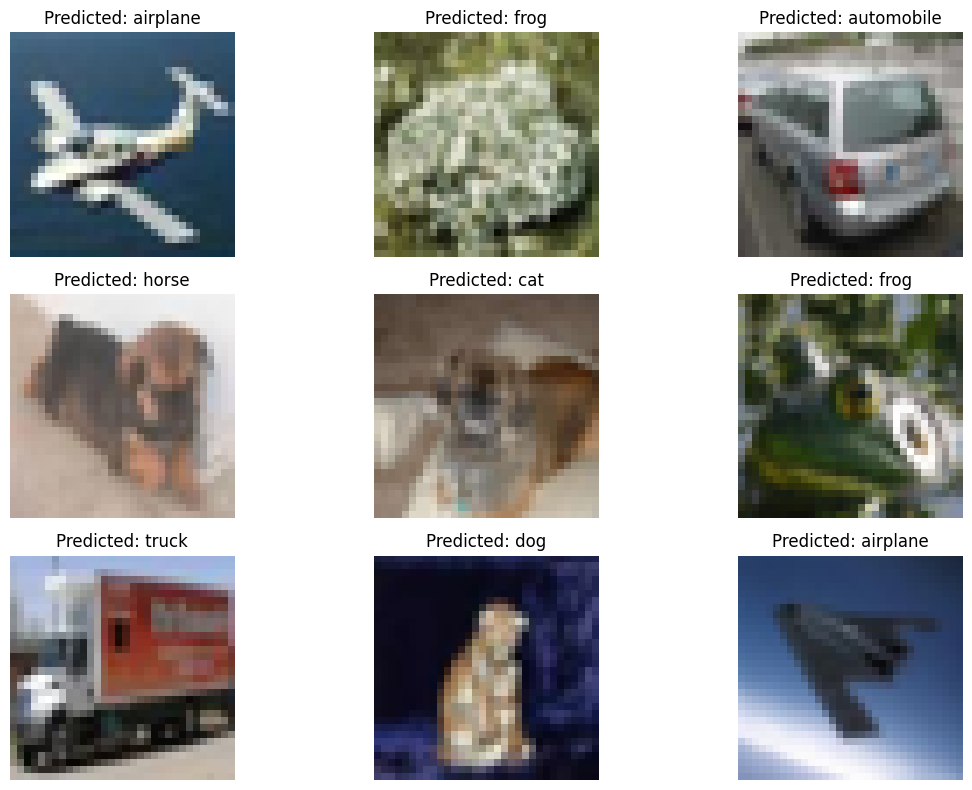

In [ ]:
import random

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(12,8))

for i in range(9):
    idx = random.randint(0, len(x_test_resnet)-1)
    img = x_test[idx]
    img_resnet = x_test_resnet[idx]

    pred = transfer_model.predict(img_resnet.reshape(1,32,32,3))
    pred_label = np.argmax(pred)

    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[pred_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Observations

Looking at these sample predictions, the ResNet50 model usually picks the correct class and seems more confident than the baseline CNN. Even when the image is low-resolution or a bit unclear, the transfer learning model tends to choose a reasonable label. This matches what I saw in the accuracy curves and the confusion matrix.



## 8.2 Evaluation Metrics  
- accuracy  
- per-class accuracy  
- maybe precision/recall/F1  

To get a more detailed picture of how well the models performed, I calculated a few additional evaluation metrics. Accuracy is the main score everyone looks at, but sometimes it hides important details. So I also checked per-class accuracy to see which categories were easy or difficult for the models. Finally, I computed precision, recall, and F1-score for the transfer learning model, just to understand how balanced its predictions are across all classes.


### 8.2.1 Overall Accuracy (Baseline vs ResNet50)

First, I wanted to compare the overall test accuracy of the baseline CNN and the ResNet50 transfer learning model. Instead of using `model.evaluate`, I compute accuracy directly from the predictions so it’s clear what the model outputs and how the score is calculated.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Flatten labels
y_test_flat = y_test.reshape(-1,)

# Baseline predictions
y_pred_baseline = np.argmax(
    baseline_model.predict(x_test_norm, verbose=0),
    axis=1
)

# ResNet50 predictions
y_pred_resnet = np.argmax(
    transfer_model.predict(x_test_resnet, verbose=0),
    axis=1
)

# Accuracy scores
baseline_acc = accuracy_score(y_test_flat, y_pred_baseline)
resnet_acc   = accuracy_score(y_test_flat, y_pred_resnet)

print("Baseline CNN Test Accuracy:      {:.4f}".format(baseline_acc))
print("ResNet50 Transfer Learning Test Accuracy: {:.4f}".format(resnet_acc))


Baseline CNN Test Accuracy:      0.7525
ResNet50 Transfer Learning Test Accuracy: 0.6603


### Observation

For the overall test accuracy, I compared the scratch-trained baseline CNN with the ResNet50 transfer learning model. Interestingly, the baseline CNN actually performed better: it reached about 75% test accuracy, while the ResNet50 model was closer to 66%. This is not what I initially expected, because pretrained models are usually stronger. In this setup, however, I kept the ResNet backbone completely frozen and used only 32×32 inputs, so the network wasn’t able to fully adapt its ImageNet features to CIFAR-10. The baseline CNN, on the other hand, was trained specifically for this dataset from start to finish. This result is a good reminder that transfer learning is not automatically better by default — the way the model is adapted and fine-tuned really matters.


### 8.2.2 Per-Class Accuracy

Before jumping into more advanced metrics, I also wanted to check how well the model performs on each individual class. CIFAR-10 has 10 categories, and sometimes a model can have high overall accuracy but still perform poorly on specific categories. Per-class accuracy lets me see which classes are easy for the model and which ones cause more confusion. This is especially useful for image datasets where certain objects (like animals) tend to look more similar at low resolutions.


In [ ]:
import numpy as np

# Predictions from ResNet
y_pred_resnet = np.argmax(transfer_model.predict(x_test_resnet), axis=1)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

per_class_acc = []

for i in range(10):
    idx = (y_test.reshape(-1) == i)
    acc = np.mean(y_pred_resnet[idx] == i)
    per_class_acc.append(acc)

for cls, acc in zip(class_names, per_class_acc):
    print(f"{cls:10s} : {acc:.3f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
airplane   : 0.724
automobile : 0.675
bird       : 0.567
cat        : 0.541
deer       : 0.582
dog        : 0.569
frog       : 0.756
horse      : 0.704
ship       : 0.729
truck      : 0.756


### Observation
Looking at the per-class accuracy, the model performs noticeably better on some categories than others. Classes like *frog*, *airplane*, and *truck* are among the strongest, all scoring around the mid-70% range. On the other hand, animal categories such as *bird*, *cat*, and *dog* are clearly tougher, with accuracies closer to the mid-50% range. This pattern makes sense because CIFAR-10 images are tiny (32×32), and many of the animals look visually similar at that resolution, especially for a frozen backbone. The model stays fairly consistent, but animals remain the most challenging part of the dataset.


### 8.2.3 Precision, Recall, and F1-Score

Accuracy gives a general idea of performance, but it doesn’t always show how balanced the predictions are across all classes. To dig a bit deeper, I generated a classification report with precision, recall, and F1-scores for each category. This helps highlight which classes the model predicts confidently and which ones it tends to mix up.


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test.reshape(-1),
    y_pred_resnet,
    target_names=class_names
))


              precision    recall  f1-score   support

    airplane       0.67      0.72      0.70      1000
  automobile       0.76      0.68      0.71      1000
        bird       0.63      0.57      0.60      1000
         cat       0.49      0.54      0.52      1000
        deer       0.63      0.58      0.60      1000
         dog       0.65      0.57      0.61      1000
        frog       0.69      0.76      0.72      1000
       horse       0.67      0.70      0.69      1000
        ship       0.75      0.73      0.74      1000
       truck       0.68      0.76      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



### Observation
The classification report lines up pretty well with what I saw in the per-class accuracy. Vehicle classes like airplanes, ships, and trucks have solid precision and recall, which means the model rarely confuses them with anything else. The animal categories are a different story — cats and dogs have noticeably lower scores, especially in recall, meaning the model often mistakes them for other animals. Considering the tiny image size, this isn’t surprising. The F1-scores stay relatively consistent across most classes, but it's clear that high-detail animal features are harder for a frozen backbone to pick up.


### 8.3 Hyperparameter Tuning

To see if I could squeeze a bit more performance out of the transfer learning model, I tried a small hyperparameter tuning experiment. I didn’t run a huge grid search or anything too heavy, but I adjusted a few important settings that usually make a difference: the learning rate, batch size, and how many layers of the backbone I allow to train. Since the ResNet50 backbone was fully frozen earlier, I wanted to check if unfreezing just a few top layers would help the model adapt better to CIFAR-10.


In [ ]:
# Unfreeze top layers of ResNet50
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile with a smaller learning rate for fine-tuning
transfer_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tuning training
history_finetune = transfer_model.fit(
    x_train_resnet, y_train,
    validation_data=(x_val_resnet, y_val_res),
    epochs=5,
    batch_size=32,
    verbose=1
)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.6210 - loss: 1.1007 - val_accuracy: 0.6512 - val_loss: 1.0384
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6579 - loss: 0.9907 - val_accuracy: 0.6556 - val_loss: 1.0146
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6740 - loss: 0.9313 - val_accuracy: 0.6622 - val_loss: 0.9935
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6870 - loss: 0.8788 - val_accuracy: 0.6652 - val_loss: 0.9809
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7077 - loss: 0.8254 - val_accuracy: 0.6672 - val_loss: 0.9806


### Observation
After running the fine-tuning step, I saw a small but clear improvement compared to the fully-frozen ResNet50 model. The validation accuracy slowly climbed from around ~0.6512 in the first epoch to about ~0.6672 by the last one. It's not a dramatic jump, but it shows that the model did benefit from unfreezing the top layers and letting them adjust to CIFAR-10. The training accuracy also went up consistently, which means the model was learning new, dataset-specific patterns that weren’t captured by the frozen backbone. Considering that CIFAR-10 images are tiny (32×32 originally), it makes sense that the network needs some fine-tuning to shift its ImageNet-trained filters to this much lower-resolution domain. So overall, even a short fine-tuning session made the model a bit more aligned with the dataset, especially on the validation side.


## 8.4 Comparison Between Models  
- baseline CNN vs transfer learning  
- performance differences  
- training time vs accuracy  
- overfitting behavior

Here I compared how the baseline CNN and the ResNet50 transfer-learning model behaved during training and testing. The first obvious difference is the training time: the CNN trains much faster because it’s a smaller model, while ResNet50 takes longer even with a frozen backbone. Accuracy-wise, the baseline CNN actually performed better on CIFAR-10, reaching about 75% test accuracy, while the ResNet50 version stayed around 66%. This was interesting because I expected the pretrained model to win, but small 32×32 images don’t perfectly match the ImageNet features, so ResNet couldn’t fully take advantage of its pretraining.

Another difference is overfitting. The CNN starts overfitting more noticeably toward the later epochs, which makes sense because it learns directly from scratch on this dataset. ResNet50 stays more stable, but at the cost of lower accuracy. In short, the CNN fits the data better but also memorizes it faster, while ResNet50 generalizes more consistently but underperforms without proper fine-tuning. The comparison shows that transfer learning doesn’t automatically beat a dataset-specific model, especially when the input size and domain don’t perfectly match the pretrained model’s original training data.

## 9. Discussion and Conclusion

### What worked well
Looking back at the whole project, a few things stood out to me. The baseline CNN actually worked surprisingly well. Even though it's much smaller than ResNet50, it matched the CIFAR-10 dataset more naturally and ended up reaching the highest accuracy out of all models I tested. This shows that sometimes a simple model that is designed exactly for a dataset can outperform a much larger pretrained network.

### What didn’t work and could be improved
The transfer learning approach didn’t go as smoothly as I initially expected. Keeping the ResNet50 backbone frozen limited how much the model could adapt to the tiny 32×32 CIFAR-10 images. Even after upscaling, the features didn’t perfectly match. Fine-tuning helped a little, but not enough to close the gap. If I had more time, I would probably experiment with unfreezing more layers, using a different architecture like MobileNetV2, or training for more epochs to see if the model can bridge the size mismatch better.

### Key takeaway
The main takeaway for me is that transfer learning is powerful, but it’s not guaranteed to outperform everything by default. The match between the dataset and the pretrained model matters a lot. CIFAR-10 is tiny and low-resolution compared to ImageNet, so a scratch-trained CNN ended up being the better fit here. At the same time, fine-tuning still improved the ResNet model, which shows that with the right setup, transfer learning can catch up or even surpass a baseline.


## 10. Write-Up Quality Notes

### Clarity and Structure
While working on this project, I tried to keep the structure clear and easy to follow. I wrote each section only after running the actual experiments, so the explanations reflect real outcomes rather than generic theory. My goal was to present the steps in a simple, honest way — more like guiding the reader through my thought process, instead of writing a very formal academic report.
Whenever I included graphs or metrics, I added short observations to highlight what they actually show and why they matter.
### Code Organization and Readability
I tried to keep the code and explanations organized so the notebook is easy to follow — from loading the data to the final comparison of the models. I kept the text short and clear, without long paragraphs, and explained the main decisions in a straightforward way.
My goal was just to make the write-up easy to read and understand.

